# Part I - (Dataset Exploration Title)
## by (your name here)

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Load the dataset
df_loan=pd.read_csv("prosperLoanData.csv")

In [3]:
df_loan.shape

(113937, 81)

In [4]:
# Load and print the description of the fields
df_loan_fields=pd.read_csv("Prosper Loan Data - Variable Definitions.csv", header=0)
print(df_loan_fields)

                           Variable  \
0                        ListingKey   
1                     ListingNumber   
2               ListingCreationDate   
3                       CreditGrade   
4                              Term   
5                        LoanStatus   
6                        ClosedDate   
7                       BorrowerAPR   
8                      BorrowerRate   
9                       LenderYield   
10          EstimatedEffectiveYield   
11                    EstimatedLoss   
12                  EstimatedReturn   
13          ProsperRating (numeric)   
14            ProsperRating (Alpha)   
15                     ProsperScore   
16                  ListingCategory   
17                    BorrowerState   
18                       Occupation   
19                 EmploymentStatus   
20         EmploymentStatusDuration   
21              IsBorrowerHomeowner   
22                 CurrentlyInGroup   
23                         GroupKey   
24                 DateCr

In [5]:
df_loan_fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
Variable       81 non-null object
Description    81 non-null object
dtypes: object(2)
memory usage: 1.6+ KB


In [6]:
# peek at the structure of the loan dataframe
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [7]:
df_loan.tail()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [8]:
# Show the type of the fields in the loan dataframe
df_loan.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [9]:
# General view of the numneric data types to see number of rows, if data is missing and where
df_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


Preliminary review:
We have 81 fields, 61 of which are numeric. There is a total of 113937 rows of data, but only 84853 seem to have complete data for all the numerical fields. This coud be due to some field being only relevant to closed loans vs others being only relevant for currently open loans at the time the data was gathered. 

This is confirmed by some of the information found in the field description file. For example the field "EstimatedEffectiveYield" is only applicable to loans issued after July 2009

### What is the structure of your dataset?

>Dataset consists of 81 columns (fields) and 113937 rows. Of the 81 fields, 61 are numeric. Some fields have missing values due to parameters existing or not existing before/after certain dates like July 2009

### What is/are the main feature(s) of interest in your dataset?

> There is certainly a tremendous amount of information in the data set, enough to drown oneself. Some fields, even with a description, are no so clear to me (a non-finance person).
However, there are two types of information we can look at: 
1) Loan parameters (amount, APR) vs. other numeric variables (loan term, borrower credit score, borrower income, ...)
2) Loan parameters (amount, APR) vs. categorical fields such as borrower's residence state, employment status, home ownership, etc...

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> See answer above

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


Text(0,0.5,'Number of Loans')

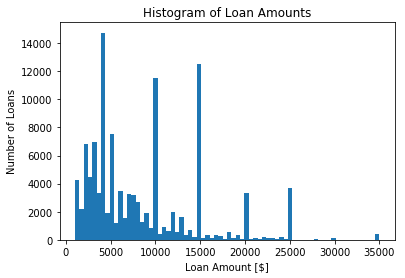

In [10]:
# Since this is about loans, first thing is to plot a histogram of loan amounts
plt.hist(data=df_loan, x='LoanOriginalAmount', bins=70);
plt.title('Histogram of Loan Amounts')
plt.xlabel('Loan Amount [$]')
plt.ylabel('Number of Loans')
#plt.xlim(0,10000)

On this first histogram we see that banks like round numbers. Indeed, we see spikes in loans amounts of $4,000, $5,000, $10K, $15K, $20K, $25K and less clearly $30K and $35K. We also notice that there are no loans with an amount less than $1,000.

So whoever Prosper Loan is, they look to deal only with personal loans. Definitely not mortgages. This is confirmed by looking at the loan Term columns in df_loan.describe(), where the min and max term for a loan are 1 and 5 years respectively. 

This is also confirmed by looking at the field descriptions file. The field "ListingCategory" categorizes the reason for a loan and they all appear to be short term.

In [11]:
# Let's look at loan amounts less than $15K
print(df_loan.query('LoanOriginalAmount <=15000')['LoanOriginalAmount'].count())
print(df_loan.query('LoanOriginalAmount <=10000')['LoanOriginalAmount'].count())

102993
82960


So about 70% of the loans are for less than $10K and 90% are for less than $15K. So we can focus on those less than $15K and still draw some pretty useful conclusions about the data

Let's now look at the term field. See if anything interesting comes out of it

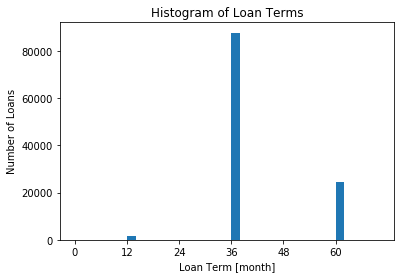

In [12]:
bins=np.arange(0, df_loan['Term'].max()+12,2)
ticks=[0,12,24,36,48,60]
labels=['{}'.format(v) for v in ticks]
plt.hist(data=df_loan, x='Term', bins=bins)
plt.title('Histogram of Loan Terms')
plt.xlabel('Loan Term [month]')
plt.ylabel('Number of Loans')
plt.xticks(ticks, labels);

Ah, so now this is interesting. We only see loans for one, three and five years, with a large majority of them for three years. This was unexpected.

Let's see if there is a correlation between loan term and loan amount

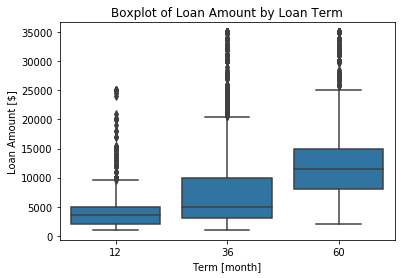

In [13]:
sb.boxplot(data=df_loan,x='Term', y='LoanOriginalAmount', color=sb.color_palette()[0]);
plt.title('Boxplot of Loan Amount by Loan Term')
plt.xlabel('Term [month]')
plt.ylabel('Loan Amount [$]');

This makes sense. The higher the loan amount, the longer the term in general.

Let's now look at the LoanStatus field

In [14]:
df_loan_status=df_loan['LoanStatus'].value_counts().reset_index()
df_loan_status.columns=['status','count']
df_loan_status

,status,count
0,Current,56576
1,Completed,38074
2,Chargedoff,11992
3,Defaulted,5018
4,Past Due (1-15 days),806
5,Past Due (31-60 days),363
6,Past Due (61-90 days),313
7,Past Due (91-120 days),304
8,Past Due (16-30 days),265
9,FinalPaymentInProgress,205


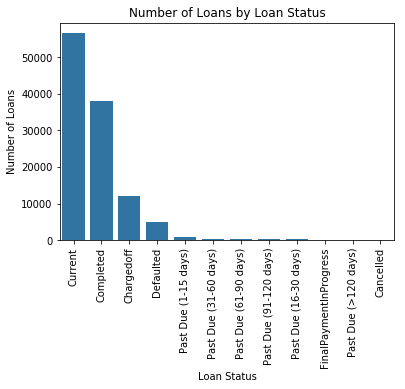

In [15]:
sb.barplot(data=df_loan_status, x='status', y='count', color=sb.color_palette()[0])
plt.title('Number of Loans by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.xticks(rotation=90);

From this plot, we conclude that slightly over 83% of all the loans are in good standing (either Current or Completed). The other 20% or so are in trouble in some way, shape or form (past due various amounts, defaulted, etc..)

Let's look at credit score vs. Loan Amount
First we plot the lower limit of the borrower's credit score range against Loan amount

Text(0,0.5,'Lower Limit of Credit Score')

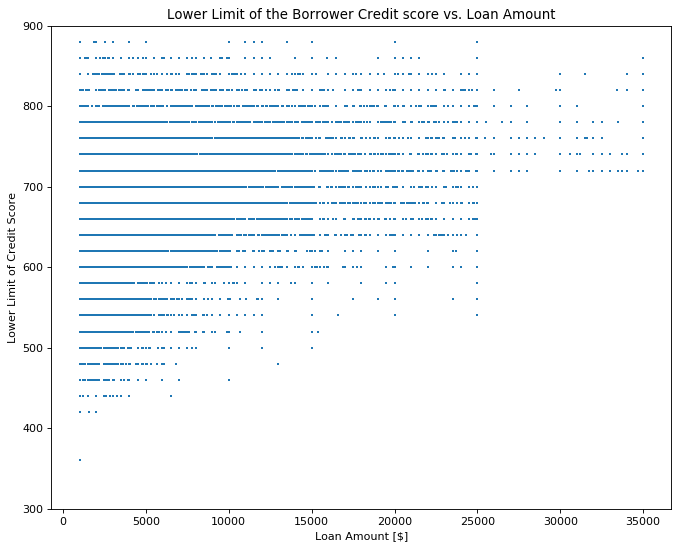

In [16]:
plt.figure(figsize=(10,8), dpi=80) 
plt.scatter(data=df_loan,x='LoanOriginalAmount',y='CreditScoreRangeLower', marker='+', s=1)
plt.ylim(300,900);
plt.title('Lower Limit of the Borrower Credit score vs. Loan Amount')
plt.xlabel('Loan Amount [$]')
plt.ylabel('Lower Limit of Credit Score')
       

As expected, for the lowest of loan amounts any credit score will do. However, as the amount of the loan increases so does the minimum credit score required to get the loan. There is also a sharp increase in minimum credit score required after the $25,000 amount.

Possibly we can remove some of the noise in this plot, by finding the minimum of the lower score range for each loan amount

In [17]:
df1=df_loan.groupby(['LoanOriginalAmount'])['CreditScoreRangeLower'].min().reset_index()
df1.columns=['amount','min_score']
df1.head(10)

,amount,min_score
0,1000,0.0
1,1001,0.0
2,1005,460.0
3,1010,540.0
4,1025,440.0
5,1030,560.0
6,1031,600.0
7,1032,560.0
8,1035,500.0
9,1036,820.0


Text(0,0.5,'Minimum Credit Score')

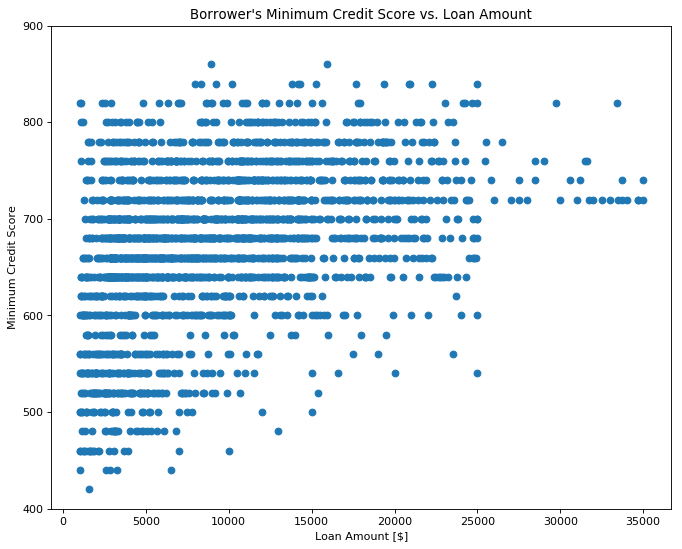

In [18]:
plt.figure(figsize=(10,8), dpi=80) 
plt.scatter(data=df1,x='amount',y='min_score', marker='o')
plt.ylim(400,900);
plt.title("Borrower's Minimum Credit Score vs. Loan Amount")
plt.xlabel('Loan Amount [$]')
plt.ylabel('Minimum Credit Score')

That did not work. Reason is there is still a lot of noise in the data even after grouping by loan values. A better plot would be to bin the loan amounts and plot the minimum credit score for each bin after removing the zero values

In [19]:
# Remove rows with zero minimum credit score
print(df_loan.shape)
df1=df_loan.loc[df_loan['CreditScoreRangeLower'] !=0]
print(df1.shape)

(113937, 81)
(113804, 81)


So only 133 rows have been removed. A small number that should not affect future conclusions/insights

In [20]:
bin_center=[]
min_score=[]
for i in range(0,68):
    bin_center.append(1250+i*500)
    low_bound=1000+i*500
    high_bound=1000+(i+1)*500
    my_min=df1.query('LoanOriginalAmount >= @low_bound and LoanOriginalAmount < @high_bound')['CreditScoreRangeLower'].min()
    min_score.append(my_min)
    
# Make dataframe with those two lists
df_minscore=pd.DataFrame({'bin_center': bin_center, 'min_score': min_score})
df_minscore.head()

,bin_center,min_score
0,1250,360.0
1,1750,420.0
2,2250,420.0
3,2750,440.0
4,3250,440.0


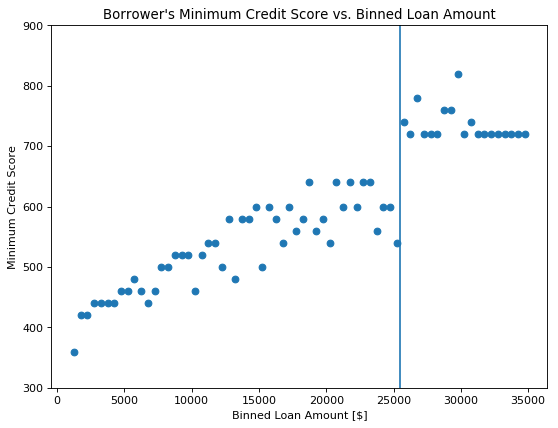

In [21]:
# Make the plot
plt.figure(figsize=(8,6), dpi=80) 
plt.scatter(data=df_minscore,x='bin_center',y='min_score', marker='o')
plt.ylim(300,900);
plt.title("Borrower's Minimum Credit Score vs. Binned Loan Amount")
plt.xlabel('Binned Loan Amount [$]')
plt.ylabel('Minimum Credit Score')
plt.axvline(x=25500)

Still a wee bit of noise probably due to the individual borrowers' financial history but the trend is clear and so is the jump in credit score at the $25,000 loan mark

Now let us look at the debt to income ratio.

In [22]:
df_loan['DebtToIncomeRatio'].describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

In [23]:
df_loan_debt=df_loan['DebtToIncomeRatio'].value_counts().reset_index()
df_loan_debt.columns=['DebtToIncomeRatio','count']
df_loan_debt

,DebtToIncomeRatio,count
0,0.18000,4132
1,0.22000,3687
2,0.17000,3616
3,0.14000,3553
4,0.20000,3481
5,0.16000,3442
6,0.19000,3392
7,0.15000,3338
8,0.21000,3226
9,0.13000,3169


In [24]:
# Remove zero values
df3=df_loan_debt.query('DebtToIncomeRatio !=0.0')
df3.head()

,DebtToIncomeRatio,count
0,0.18,4132
1,0.22,3687
2,0.17,3616
3,0.14,3553
4,0.20,3481


In [25]:
df3.sort_values('DebtToIncomeRatio', inplace=True)
df3.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DebtToIncomeRatio,count
938,0.00044,1
1040,0.00310,1
529,0.00611,1
1047,0.00647,1
678,0.00677,1


In [26]:
df3['log10']=np.log10(df3['DebtToIncomeRatio'])
df3.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DebtToIncomeRatio,count,log10
938,0.00044,1,-3.356547
1040,0.00310,1,-2.508638
529,0.00611,1,-2.213959
1047,0.00647,1,-2.189096
678,0.00677,1,-2.169411


In [27]:
df3.to_csv('df3.csv')

In [28]:
df3['log10'].describe()

count    1206.000000
mean       -0.637962
std         0.689390
min        -3.356547
25%        -1.078652
50%        -0.772551
75%        -0.231004
max         1.000434
Name: log10, dtype: float64

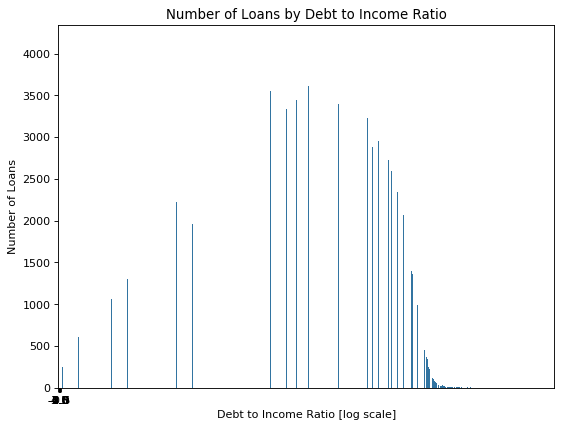

In [29]:
plt.figure(figsize=(8,6), dpi=80) 
g=sb.barplot(data=df3, x='log10', y='count', color=sb.color_palette()[0])
plt.title('Number of Loans by Debt to Income Ratio')
plt.xlabel('Debt to Income Ratio [log scale]')
plt.ylabel('Number of Loans')

x1=[-4.0,-3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5 ]
g.set_xticks(x1)
g.set_xticklabels(x1);
#g.set_xscale('log', nonposx='clip')
#plt.xscale('log', nonposx='clip')

In [30]:
df3['DebtToIncomeRatio'].describe()

count    1206.000000
mean        0.870804
std         1.662748
min         0.000440
25%         0.083435
50%         0.168830
75%         0.587500
max        10.010000
Name: DebtToIncomeRatio, dtype: float64

(array([ 365.,  367.,   92.,   44.,   21.,   17.,   11.,   10.,   10.,
          10.,   10.,   11.,    9.,   10.,    8.,   10.,   10.,    7.,
           8.,    7.,    5.,    6.,    8.,    4.,    5.,    5.,    5.,
           4.,    2.,    4.,    2.,    4.,    6.,    3.,    2.,    4.,
           3.,    4.,    2.,    1.,    3.,    5.,    3.,    3.,    4.,
           2.,    2.,    4.,    4.,    1.,    4.,    3.,    4.,    4.,
           0.,    4.,    4.,    1.,    0.,    1.,    4.,    0.,    1.,
           1.,    1.,    1.,    2.,    0.,    1.,    2.,    1.,    0.,
           2.,    0.,    2.,    2.,    0.,    1.,    0.,    2.,    1.,
           1.,    1.,    0.,    0.,    2.,    1.,    0.,    0.,    0.,
           1.,    1.,    0.,    0.,    1.,    0.,    0.,    1.,    0.,    0.]),
 array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
          0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
          1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.

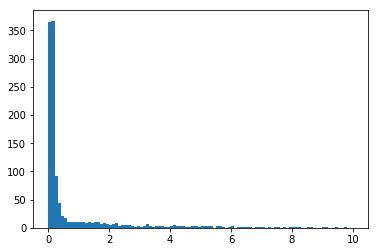

In [31]:
bin_size=0.1
bin_edges=np.arange(0,10+bin_size,bin_size)
plt.hist(data=df3,x='DebtToIncomeRatio', bins=bin_edges)

Let's look at the borrower APR on the loan. From the describe() command we know that some rows have NaN for value, so we need to remove those first

In [32]:
df_loan['BorrowerAPR'].describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

In [33]:
df_APR=df_loan[df_loan['BorrowerAPR'].notna()]

Text(0,0.5,'Number of Loans')

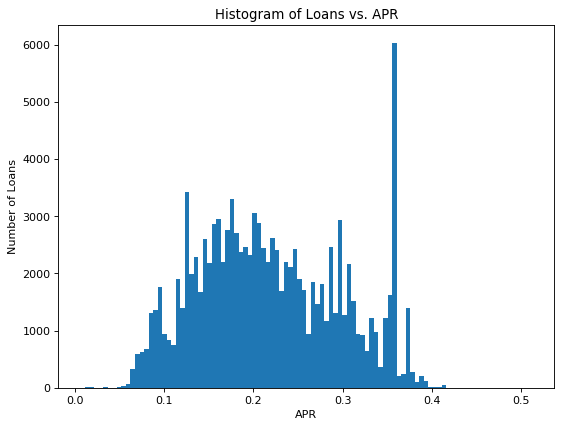

In [34]:
plt.figure(figsize=(8,6), dpi=80) 
plt.hist(data=df_APR, x='BorrowerAPR', bins=100);
plt.title('Histogram of Loans vs. APR')
plt.xlabel('APR')
plt.ylabel('Number of Loans')

In [35]:
df_APR2=df_APR.query('Term==12 or Term==36 or Term==60')

In [36]:
# Make Term a categorical variable for plotting purpose
df_APR2['Term']=df_APR2['Term'].astype('category')
df_APR2['Term'].dtype

CategoricalDtype(categories=[12, 36, 60], ordered=False)

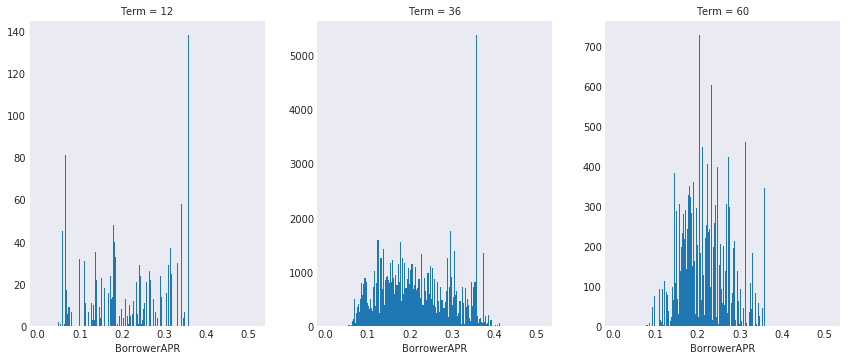

In [37]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8
#sb.set(rc = {'figure.figsize':(15,8)})
sb.set_style('whitegrid')
sb.set_style('dark')

g=sb.FacetGrid(data=df_APR2,col='Term',sharey=False)
g.map(plt.hist,'BorrowerAPR', bins=200)
plt.gcf().set_size_inches(12, 6)
g.add_legend();
#plt.figure(figsize=(14.0,8.0)) 


In [38]:
print(test)

NameError: name 'test' is not defined

In [ ]:
df_loan.loc[113921,'BorrowerAPR']

In [ ]:
plt.hist(data=df_apr, x='BorrowerAPR', bins=25);
plt.title('Histogram of Loan Amounts')
plt.xlabel('Loan Amount [$]')
plt.ylabel('Number of Loans')



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

